In [26]:
from datetime import date
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

today = date.today().strftime("%Y-%m-%d")

tickers = ["^GSPC", "^IXIC", "^GDAXI", "^FTSE"]


ind_data = yf.download(tickers, start="1997-01-01", end=today)
ind_data
adj_close_only = ind_data["Close"]
adj_close_only

/var/folders/9t/pmjxxbqs3j19rnf8hr5qxzvm0000gn/T/ipykernel_24849/3653760434.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ind_data = yf.download(tickers, start="1997-01-01", end=today)
[*********************100%***********************]  4 of 4 completed


Ticker,^FTSE,^GDAXI,^GSPC,^IXIC
Date,,,,
1997-01-02,4057.399902,2820.810059,737.010010,1280.699951
1997-01-03,4089.500000,2863.260010,748.030029,1310.680054
1997-01-06,4106.500000,2890.199951,747.650024,1316.400024
1997-01-07,4078.800049,2876.340088,753.229980,1327.729980
1997-01-08,4087.500000,2904.080078,748.409973,1320.349976
...,...,...,...,...
2025-06-30,8761.000000,23909.609375,6204.950195,20369.730469
2025-07-01,8785.299805,23673.289062,6198.009766,20202.890625
2025-07-02,8774.700195,23790.109375,6227.419922,20393.130859


In [27]:
adj_close_only.head()

Ticker,^FTSE,^GDAXI,^GSPC,^IXIC
Date,,,,
1997-01-02,4057.399902,2820.810059,737.010010,1280.699951
1997-01-03,4089.500000,2863.260010,748.030029,1310.680054
1997-01-06,4106.500000,2890.199951,747.650024,1316.400024
1997-01-07,4078.800049,2876.340088,753.229980,1327.729980
1997-01-08,4087.500000,2904.080078,748.409973,1320.349976


In [28]:
adj_close_only.tail()

Ticker,^FTSE,^GDAXI,^GSPC,^IXIC
Date,,,,
2025-06-30,8761.000000,23909.609375,6204.950195,20369.730469
2025-07-01,8785.299805,23673.289062,6198.009766,20202.890625
2025-07-02,8774.700195,23790.109375,6227.419922,20393.130859
2025-07-03,8823.200195,23934.130859,6279.350098,20601.099609
2025-07-04,8822.900391,23787.449219,NaN,NaN


(7362, 4)

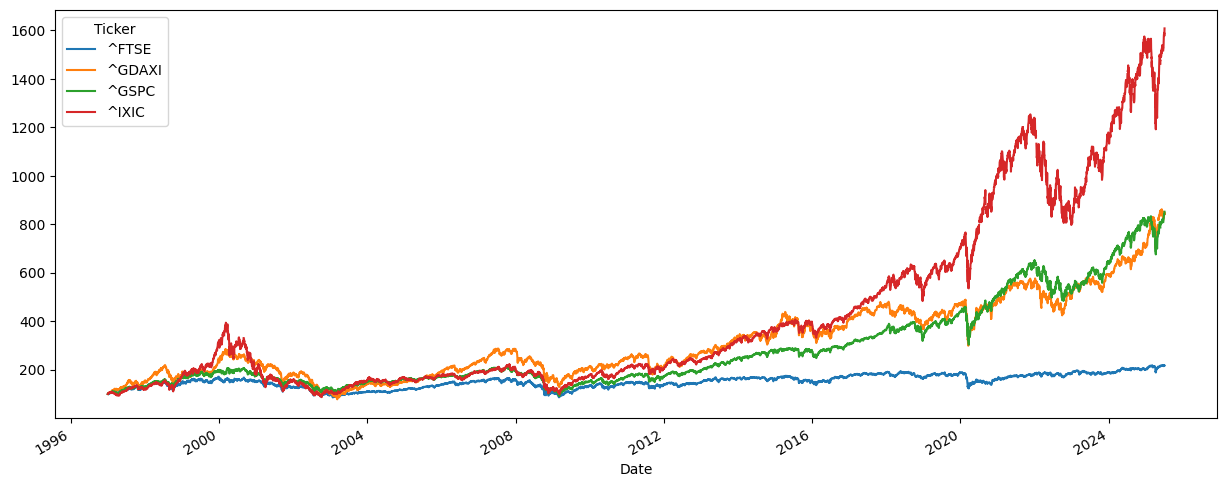

In [38]:
(adj_close_only / adj_close_only.iloc[0] * 100).plot(figsize=(15, 6))
adj_close_only.shape

In [47]:
ind_returns = (adj_close_only / adj_close_only.shift(1) - 1).dropna()
ind_returns.tail()

Ticker,^FTSE,^GDAXI,^GSPC,^IXIC
Date,,,,
2025-06-27,0.007246,0.016234,0.005219,0.005234
2025-06-30,-0.004307,-0.005143,0.005164,0.004749
2025-07-01,0.002774,-0.009884,-0.001119,-0.008191
2025-07-02,-0.001207,0.004935,0.004745,0.009416
2025-07-03,0.005527,0.006054,0.008339,0.010198


In [59]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

Ticker
^FTSE     0.029063
^GDAXI    0.085110
^GSPC     0.093862
^IXIC     0.128752
dtype: float64

In [70]:
tickers = ['PG', '^GSPC', "^DJI"]

data_2 = yf.download(tickers, start="2007-01-01", end=today)['Close']
data_2.tail()

/var/folders/9t/pmjxxbqs3j19rnf8hr5qxzvm0000gn/T/ipykernel_24849/111882365.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_2 = yf.download(tickers, start="2007-01-01", end=today)['Close']
[*********************100%***********************]  3 of 3 completed


Ticker,PG,^DJI,^GSPC
Date,,,
2025-06-27,159.860001,43819.269531,6173.069824
2025-06-30,159.320007,44094.769531,6204.950195
2025-07-01,161.220001,44494.941406,6198.009766
2025-07-02,161.199997,44484.421875,6227.419922
2025-07-03,160.830002,44828.531250,6279.350098


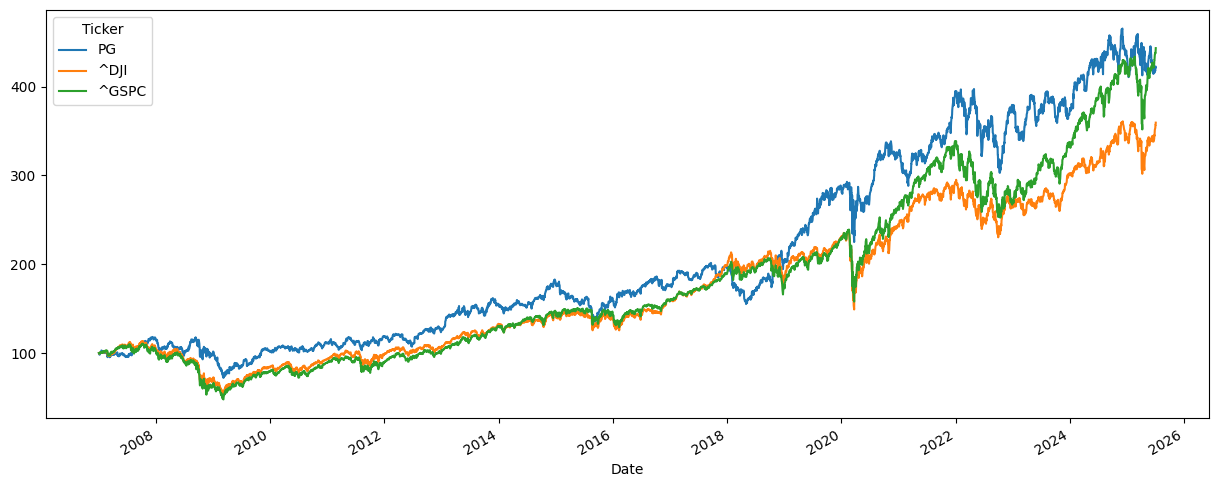

In [72]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

In [76]:
data_2_returns = (data_2 / data_2.shift(1) - 1).dropna()
data_2_returns.tail()

Ticker,PG,^DJI,^GSPC
Date,,,
2025-06-27,0.007754,0.009967,0.005219
2025-06-30,-0.003378,0.006287,0.005164
2025-07-01,0.011926,0.009075,-0.001119
2025-07-02,-0.000124,-0.000236,0.004745
2025-07-03,-0.002295,0.007736,0.008339


In [77]:
data_2_annual_returns = data_2_returns.mean() * 250
data_2_annual_returns

Ticker
PG       0.094320
^DJI     0.086441
^GSPC    0.099983
dtype: float64